# The Nordic Prior Knowledge Test in Programming
**Author**: [Sondre Sæther Bolland](https://www.uib.no/personer/Sondre.S%C3%A6ther.Bolland)

**Institution**: Department of Informatics, University of Bergen

**Email**: sondre.bolland@uib.no

## Introduction
The Nordic Prior Knowledge Test in Programming is a tool for assessing students’ programming skill. The test covers the fundamental elements of introductory programming taught at different universities and university colleges in Norway and Sweden. By testing the students in the concepts found in CS1 we aim for instructors to be better able to develop and adapt their courses to this new found prior knowledge.

This Notebook is a dynamic report of the results from 2024, designed to effectivly convey the findings of the test at the start of the semester. The (static) written report will be published sometime fall 2024 here: https://programmeringstesten.no/ 

### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats

### Data
Before using this notebook two python scripts need to be run. A requirement to run these scripts is to have the csv file with the original dataset: `total.csv`. This must be placed in the `data` folder in the main directory (where this Notebook is located).

`clean_data.py` cleans certain columns for ambigious data and renames columns for analysis.

`grade_submissions.py` grades each question based on the rubric (`rubric.json`).

In [3]:
#!python clean_data.py
#!python grade_submissions.py

### Dataset

In [4]:
# Specify the path of the data file
path = "data/"
filename = path + "results.csv"
df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")

# Remove all students who have taken a university level course
df = df[(df['UniversityExperience'] == 'Nei')]

C:\Users\fuf007\AppData\Local\Temp\ipykernel_22740\3654758810.py:4: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")


### Filter the dataframe
Do you want to look at a specific subset of students?
Use the next cell to filter the students based on your criteria.

To reset the dataframe, simply run the cell above.

In [5]:
# Filter by institution
specific_institutions = ['UiO'] # 'UiB', 'NTNU', 'UiS', 'HVL', 'UiO', 'Kristiania', 'NMBU', 'OsloMet', 'HiOf'
#df = df[(df['Institution'].isin(specific_institutions))]

In [6]:
# Filter by Graduate Year
specific_graduateyears = ['2023', '2024'] 
#df = df[(df['GraduateYear'].isin(specific_graduateyears))]

In [7]:
# Filter by Gender
specific_genders = ['f', 'm', ' '] # 'f', 'm', ' '
#df = df[(df['Gender'].isin(specific_genders))]

## Demographics
See the background of the students. Note that there are a large number of submissions that are blank for some of the following items. This is due to the students submitting ambigious answers, which have not been labled correctly by `clean_data.py`.

In [8]:
# Total number of students
print(f"The dataset has {len(df['Total'])} student submissions.")

The dataset has 2160 student submissions.



### Institutions

Institution
NTNU          928
UiS           334
UiO           215
NMBU          206
UiB           160
Kristiania    144
HIOF           95
HVL            75
Name: count, dtype: int64


<Axes: ylabel='count'>

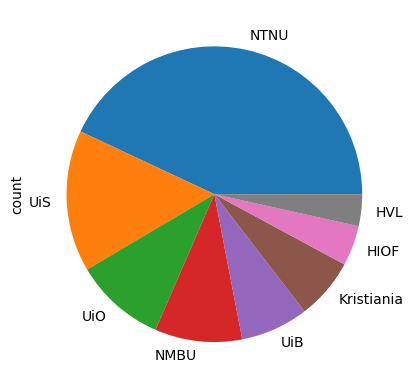

In [9]:
institutions = df.Institution.unique()

institution_column = "Institution"
print(df[institution_column].value_counts())
df[institution_column].value_counts().plot.pie()

### Graduate Year

GraduateYear
Before_2023    1159
2024            541
2023            460
Name: count, dtype: int64


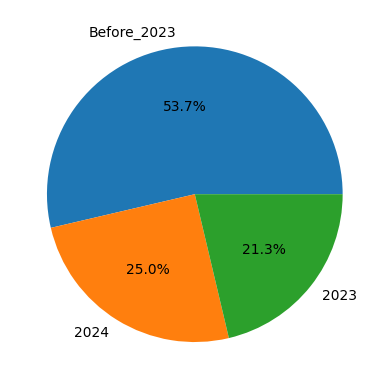

In [10]:
years = df.GraduateYear.unique()

graduateyear_column = "GraduateYear"
print(df[graduateyear_column].value_counts())
df[graduateyear_column].value_counts().plot.pie(autopct='%1.1f%%', ylabel='')
fig = plt.gcf()
plt.show()
fig.savefig('plots/graduateYear.png',dpi=300, bbox_inches='tight')

### Gender

Gender
m    1291
f     726
      143
Name: count, dtype: int64
Gender
m    0.597685
f    0.336111
     0.066204
Name: proportion, dtype: float64


<Axes: ylabel='count'>

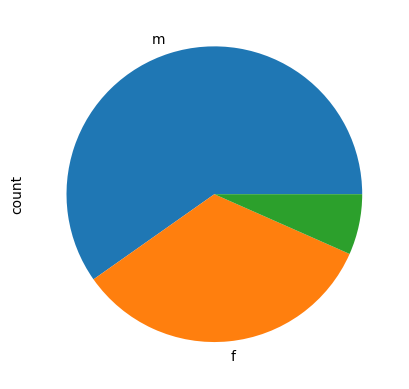

In [11]:
genders = df.Gender.unique()
gender_column = "Gender"

print(df[gender_column].value_counts())
print(df[gender_column].value_counts(normalize=True))
df[gender_column].value_counts().plot.pie()

## Educational Background
What experiences with programming do these students have? 

### Elective Programming Courses
During the secondary school phase, students have the option to take three elective courses in programming: *Information Technology 1* (IT1), *Information Technology 2* (IT2), and *Programming and Modelling X* (PMX). 

In [13]:
# Make new column for NO elective programming course
courses = ['ElectiveCourse.IT1', 'ElectiveCourse.IT2', 'ElectiveCourse.PMX']
df_temp = df[(~df['ElectiveCourse.IT1'].isin(courses))]
df_temp = df_temp[(~df_temp['ElectiveCourse.IT2'].isin(courses))]
df_temp = df_temp[(~df_temp['ElectiveCourse.PMX'].isin(courses))]
df_temp['NoElective'] = ~df_temp['ElectiveCourse.IT1'].isin(courses)

df['NoElective'] = df_temp['NoElective']

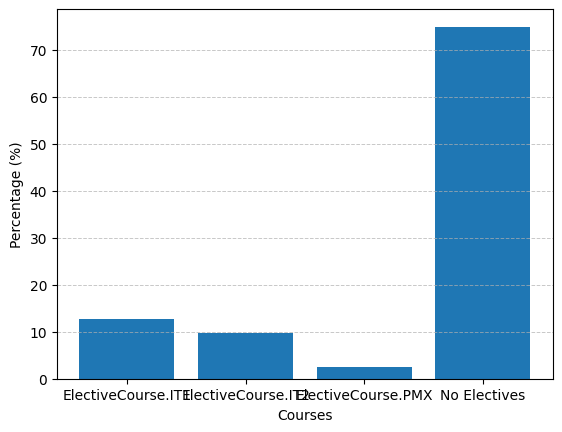

In [14]:
# Set up figure and axis
fig, ax = plt.subplots()

# Define courses and counts
courses = ['ElectiveCourse.IT1', 'ElectiveCourse.IT2', 'ElectiveCourse.PMX', 'No Electives']
n_it1 = df['ElectiveCourse.IT1'].value_counts()[1]
n_it2 = df['ElectiveCourse.IT2'].value_counts()[1]
n_pmx = df['ElectiveCourse.PMX'].value_counts()[1]
n_noelectives = df['NoElective'].value_counts()[True]
counts = [n_it1, n_it2, n_pmx, n_noelectives]

# Calculate percentages
total_students = sum(counts)
percentages = [(count / total_students) * 100 for count in counts]

# Plot the bar chart using percentages
ax.bar(courses, percentages)
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Courses')

ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)  # Horizontal grid lines

# Show the plot
plt.show()

# Save the figure
fig.savefig('plots/programmingElectives_percentage.png', dpi=300, bbox_inches='tight')

### Math Courses
The most common math courses available in secondary school are:
 * Practical Math 1 (1P)
 * Practical Math 2 (2P)
 * Theoretical Math 1 (1T)
 * Social Science Math 1 (S1)
 * Social Science Math 2 (S2)
 * Natural Science Math 1 (R1)
 * Natural Science Math 2 (R2)

The majority of students who took the test belonged to STEM fields, where the typical admission requirement includes S1 and S2 or R1 mathematics. Certain math-intensive study programs may also demand R2 mathematics. Notably, most students had completed the Natural Science Math courses (see plot below), which is the most advanced option.

[360, 313, 1175, 205, 196, 1260, 1338]


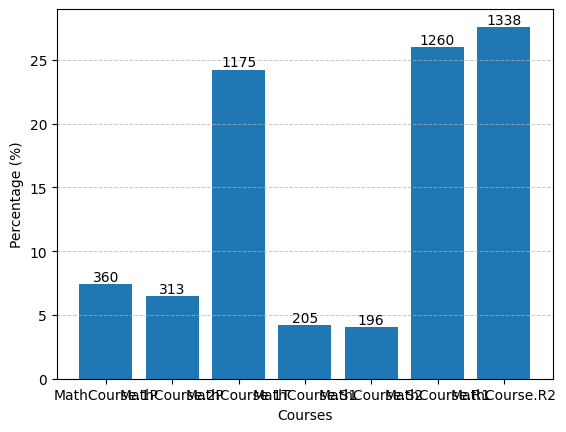

In [15]:
# Set up figure and axis
fig, ax = plt.subplots()

# Define courses
courses = ['MathCourse.1P', 'MathCourse.2P', 'MathCourse.1T', 'MathCourse.S1', 'MathCourse.S2', 'MathCourse.R1', 'MathCourse.R2']

# Initialize lists to store course data
gotten_courses = []
counts = []

# Collect counts for each course
for course in courses:
    try:
        count = df[course].value_counts()[1]
        counts.append(count)
        gotten_courses.append(course)
    except KeyError:
        continue

# Calculate percentages
total_students = sum(counts)
percentages = [(count / total_students) * 100 for count in counts]

# Plot the bar chart using percentages
bars = ax.bar(gotten_courses, percentages)
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Courses')

# Add grid lines
ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Add student counts on top of each bar
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom', fontsize=10)

# Show the plot
print(counts)
plt.show()

# Save the figure
fig.savefig('plots/courses_percentage.png', dpi=300, bbox_inches='tight')

### Experience outside of school
A source of programming knowledge is self-directed learning outside of formal education, where individuals independently explore the field, using resources like books and online materials. The following plot shows the distribution of students who report having at least 30 hours of outside experience with either block based or text based programming.

OutsideExperience
No     1701
Yes     452
Name: count, dtype: int64
OutsideExperience
No     0.79006
Yes    0.20994
Name: proportion, dtype: float64


<Axes: ylabel='count'>

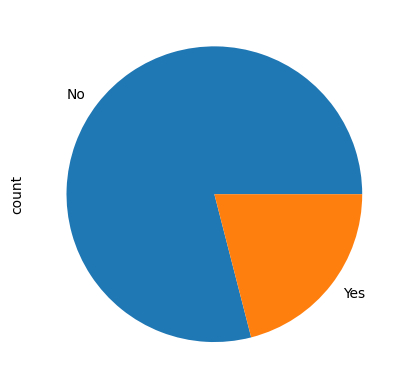

In [16]:
outside_column = "OutsideExperience"

print(df[outside_column].value_counts())
print(df[outside_column].value_counts(normalize=True))
df[outside_column].value_counts().plot.pie()

# Results
In this section of the report, the main results are presented before a review of the background the students have on the various study paths and what connection there is between background and results. Later we take a close look at how well they performed in specific programming tasks to understand their grasp of the different concepts.

In [17]:
# Configurations
bins = 20
max_points = 40.6 # i.e. range
edgecolor = 'black'
alpha = 0.5

## Main Result
A histogram of the total score of the students. Maximum score: 71.

Mean: 16.352
Standard deviation: 12.166


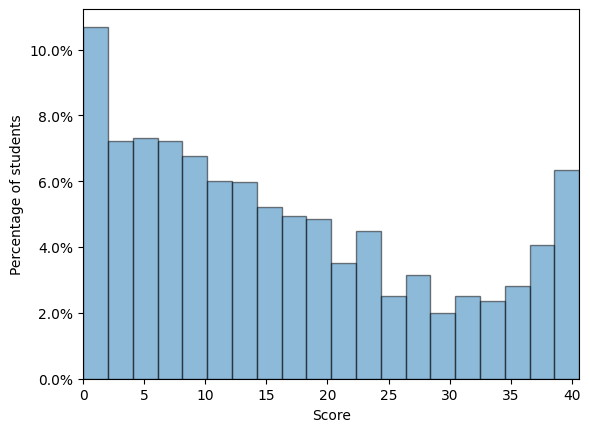

In [18]:
x = df['Total']
x_label = 'Score'

mean = df.loc[:, 'Total'].mean()
sd = df.loc[:, 'Total'].std()
print(f'Mean: {round(mean, 3)}')
print(f'Standard deviation: {round(sd, 3)}')

plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, 
         weights=np.ones(len(x)) / len(x), range=[0, max_points])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Add x and y axis labels
plt.xlabel('Score')  # Label for the x-axis
plt.ylabel('Percentage of students')  # Label for the y-axis

plt.margins(x=0.0001)
fig = plt.gcf()
plt.show()
fig.savefig('plots/allHist.png', dpi=300, bbox_inches='tight')

### Did the students find the test hard?
We asked the students to rate the test's difficulty on a Likert scale from 1 (very easy) to 7 (very hard)

<Axes: xlabel='difficulty'>

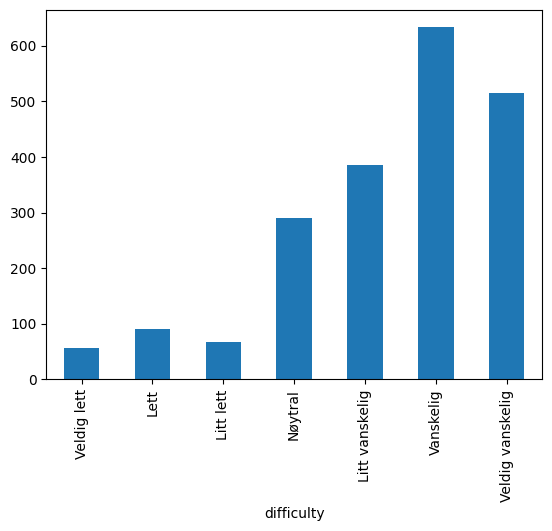

In [19]:
df['difficulty'].value_counts().loc[['Veldig lett', 'Lett', 'Litt lett', 'Nøytral', 'Litt vanskelig', 'Vanskelig', 'Veldig vanskelig']].plot.bar()

In [20]:
def compare_distributions(x, y, x_label, y_label, save_figure_name=''):
    n = len(x)
    mean = x.mean()
    sd = x.std()
    print(f'N students in {x_label}: {n}')
    print(f'Mean of {x_label}: {round(mean, 3)}')
    print(f'Standard deviation of {x_label}: {round(sd, 3)}')
    print()

    n = len(y)
    mean = y.mean()
    sd = y.std()
    print(f'N students in {y_label}: {n}')
    print(f'Mean of {y_label}: {round(mean, 3)}')
    print(f'Standard deviation of {y_label}: {round(sd, 3)}')
    
    plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, weights=np.ones(len(x)) / len(x), range=[0, max_points])
    plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, weights=np.ones(len(y)) / len(y), range=[0, max_points])
    #plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, range=[0, max_points])
    #plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, range=[0, max_points])
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

    # Add x and y axis labels
    plt.xlabel('Score')  # Label for the x-axis
    plt.ylabel('Percentage of students')  # Label for the y-axis
    
    plt.margins(x=0.0001)
    plt.legend(loc='upper right')
    fig = plt.gcf()
    plt.show()
    if save_figure_name != '':
        fig.savefig('plots/'+save_figure_name+'.png', dpi=300, bbox_inches='tight')

## Prior Programming Experience in Secondary School
In the initial segment of the test, we inquired with the students regarding their prior exposure to
programming before to commencing their higher education studies.

### Graduation Year
The educational reforms outlined in LK20 were introduced in the year 2020, resulting in programming becoming a compulsory component solely for those students who graduated in 2023 and onward.

In [21]:
# Significance test
def significane(group1, group2):
    # Perform Mann-Whitney U Test
    stat, p_value = stats.ranksums(group1, group2)
    
    # Print the test statistic and p-value
    print(f"Wilcox Rank-sum test: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation of p-value
    a = 0.05
    if p_value < a:
        print("Reject the null hypothesis: There is a significant difference between the two groups.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

N students in 2023 and 2024: 1001
Mean of 2023 and 2024: 20.459
Standard deviation of 2023 and 2024: 11.807

N students in Before 2023: 1159
Mean of Before 2023: 12.804
Standard deviation of Before 2023: 11.331


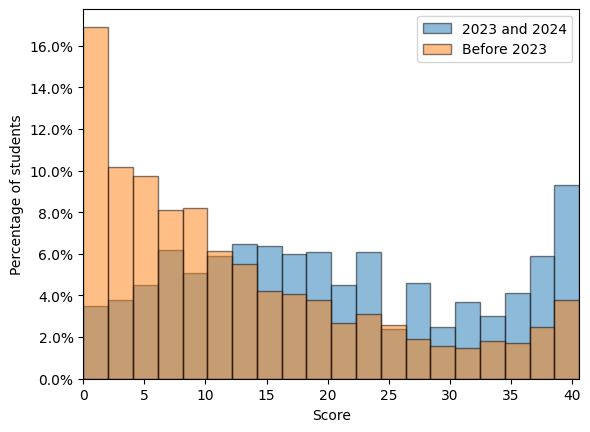

Wilcox Rank-sum test: 15.4746197897377
P-value: 5.1476501608562104e-54
Reject the null hypothesis: There is a significant difference between the two groups.


In [22]:
years = df['GraduateYear']
x = df[(years.isin(['2023', '2024']))]['Total']
y = df[(~years.isin(['2023', '2024']))]['Total']
y = y[~np.isnan(y)]

x_label = '2023 and 2024'
y_label = 'Before 2023'

compare_distributions(x, y, x_label, y_label, 'graduateYearHist')
significane(x, y)

### Mathematics Courses

In [23]:
x = df[(df['MathCourse.2P'].isin([1]))]['Total']
y = df[(df['MathCourse.R2'].isin([1]))]['Total']
y = y[~np.isnan(y)]

x_label = '2P'
y_label = 'R2'

compare_distributions(x, y, x_label, y_label)
significane(x, y)

KeyError: '2P'

### Programming Electives

In [ ]:
x = df[(df['IT2'].isin(['Informasjonsteknologi 2 (IT2)']))]['Total']
y = df[(df['NoElective'].isin([True]))]['Total']
y = y[~np.isnan(y)]

x_label = 'IT2'
y_label = 'NoElective'

compare_distributions(x, y, x_label, y_label)
significane(x, y)

### Outside Experience

In [ ]:
x = df[(df['OutsideExperience'].isin(['Ja']))]['Total']
y = df[(df['OutsideExperience'].isin(['Nei']))]['Total']
y = y[~np.isnan(y)]

x_label = 'Outside experience'
y_label = 'No outside experience'

compare_distributions(x, y, x_label, y_label)
significane(x, y)

### How many students do not need introductory programming?
The students who perform very well on this test might not need CS1. If we set an (arbitrary) point threshold we can get an indication of how many students can perhaps move on to more advanced courses.

In [ ]:
threshold = max_points * 0.9
x = df[df['Total'] > threshold]
n = len(x)
percentage = round((n/len(df))*100, 2)

print(f'Number of students with a score over {threshold}: {n} ({percentage}%)')

### How many students have not learned much?

In [ ]:
threshold = max_points * 0.2
x = df[df['Total'] < threshold]
n = len(x)
percentage = round((n/len(df))*100, 2)

print(f'Number of students with a score under {threshold}: {n} ({percentage}%)')

### Gender

In [ ]:
x = df[(df['Gender'] == 'f')]['Total']
y = df[(df['Gender'] == 'm')]['Total']

x_label = 'women'
y_label = 'men'

compare_distributions(x, y, x_label, y_label)

# Programming Tasks
Each task featured in the test pertained to a designated concept category. The following cells show the number of correct answers and the most common answers for each task.

## Correctness rate for each concept category
Below you can find the percentage of accurate responses achieved by the students for each concept.

Note that performance within each category may not exclusively reflect the students’ mastery of that programming concept. Variability in task difficulty plays a substantial role, with some tasks naturally being easier than others, irrespective of the underlying concept.

In [ ]:
def correctnes_rate(columns, category, task_weight=1):
    correct_answer_rate = 0
    for column in columns:
        points_column = column + "_points"
        task_mean = df.loc[:, points_column].mean()
        correct_answer_rate += task_mean
    correct_answer_rate /= len(columns)*task_weight
    print(f'{category:15s} {correct_answer_rate*100:3.2f} %')

In [ ]:
print("The students have the following average correctness rate for each concept category:")

# Datatypes
datatype_columns = ['datatypes1', 'datatypes2', 'datatypes3', 'datatypes4']
correctnes_rate(datatype_columns, "Datatypes")

# Operators
operator_columns = ['Operators1', 'Operators2', 'Operators3', 'Operators4', 'Operators5']
correctnes_rate(operator_columns, "Operators")

# Booleans
boolean_columns = ["100 == 100", "2 > 7", "(10 + 3) >= 13", "(10*2) < 9", "(1 + 3) < (2*3)", "(10.3 + 9) == (10.3 + 10)", "100 != 100", "(5 < 7) and (4 > 5)", "(5 < 7) or (4 > 5)", "(3 < 7) and (7 < 9)", "(3 < 7) or (7 < 9)", "not (100 != 100)", "True != True", "True and False", "True or False" , "True and True", "True or True", "not (True != True)", "n < 10", "100 == n", "(n < 7) and (4 > n)", "(n < 7) or (4 > n)", "n <= 5", "not (n < 10)"]
correctnes_rate(boolean_columns, "Booleans", task_weight=0.2)

# Variables
variable_columns = ["Variables1a", "Variables1b", "Variables2a", "Variables2b", "Variables3a", "Variables3b", "Variables4a", "Variables4b", "Variables5a", "Variables5b", "Variables5c", "Variables6a", "Variables6b", "Variables6c"]
correctnes_rate(variable_columns, "Variables", task_weight=0.2)

# Conditionals
conditional_columns = ["Conditionals1", "Conditionals2", "Conditionals3", "Conditionals4"]
correctnes_rate(conditional_columns, "Conditionals")

# Loops
loop_columns = ["Loops1", "Loops2", "Loops3", "Loops4", "Loops5", "Loops6", "Loops7"]
correctnes_rate(loop_columns, "Loops")

# Lists
list_columns = ["Lists1", "Lists2", "Lists3a", "Lists3b"]
correctnes_rate(list_columns, "Lists")

# Functions
function_columns = ["Functions1", "Functions2", "Functions3", "Functions4", "Functions5", "Functions6", "Functions7", "Functions8", "Functions9"]
correctnes_rate(function_columns, "Functions")

all_columns = datatype_columns + operator_columns + boolean_columns + variable_columns + conditional_columns + loop_columns + list_columns + function_columns

## Tasks
To gain a deeper understanding of the students’ knowledge and comprehension of specific programming concepts, it is important to analyze their performance on these concepts. 

In [ ]:
def print_task_result(task_column, df, n_answers=5, verbose_correct_answers=True):
    '''
    Print number of correct (1) and incorrect (0) responses.
    Print the top 5 most common answers.
    '''
    if verbose_correct_answers:
        task_point_column = task_column + "_points"
        print("Number of correct responses:")
        print(df[task_point_column].value_counts())
        print()
    
    print(f"Top {n_answers} most common answers:")
    try:
        print(df[task_column].value_counts()[:n_answers])
    except:
        print(df[task_column].value_counts())

# Datatypes
What datatype do the following variables have?
```python
a = 123
b = 1.23
c = '123'
d = [1, 2, 3]
```

In [ ]:
print_task_result("datatypes1", df, 6, True)
print()
print_task_result("datatypes2", df, 6, True)
print()
print_task_result("datatypes3", df, 6, True)
print()
print_task_result("datatypes4", df, 6, True)

# Operators

### Operators 1
What is the value of `result`?
```python
a = 12
result = a + a
```

In [ ]:
print_task_result("Operators1", df, 4, True)

### Operators 2
What is the value of `result`?
```python
a = 12
b = 1.23 

result = b + a
```

In [ ]:
print_task_result("Operators2", df, 4, True)

### Operators 3
What is the value of `result`?
```python
c = '123'
result = c + c
```

In [ ]:
print_task_result("Operators3", df, 4, True)

### Operators 4
What is printed here?
```python
n = 0
n = n + 1
n = n + 1

print(n)
```

In [ ]:
print_task_result("Operators4", df, 4, True)

### Operators 5
What is printed here?
```python
n = 'b'
n = n + 'c'
n = n + 'a'

print(n)
```

In [ ]:
print_task_result("Operators5", df, 10, True)

# Variables

### Variables 1
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
```

In [ ]:
print_task_result("Variables1a", df)
print_task_result("Variables1b", df)

### Variables 2
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
```

In [ ]:
print_task_result("Variables2a", df)
print_task_result("Variables2b", df)

### Variables 3
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
b = a
```

In [ ]:
print_task_result("Variables3a", df)
print_task_result("Variables3b", df)

### Variables 4
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
a = b
```

In [ ]:
print_task_result("Variables4a", df)
print_task_result("Variables4b", df)

### Variables 5
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = b
b = c
```

In [ ]:
print_task_result("Variables5a", df)
print_task_result("Variables5b", df)
print_task_result("Variables5c", df)

### Variables 6
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = c
b = a
c = b
```

In [ ]:
print_task_result("Variables6a", df)
print_task_result("Variables6b", df)
print_task_result("Variables6c", df)

## Booleans

### Booleans 1
What do these boolean expressions evaluate to?

In [ ]:
print_task_result("100 == 100", df, 3, False)
print()
print_task_result("2 > 7", df, 3, False)
print()
print_task_result("(10 + 3) >= 13", df, 3, False)
print()
print_task_result("(10*2) < 9", df, 3, False)
print()
print_task_result("(1 + 3) < (2*3)", df, 3, False)
print()
print_task_result("(10.3 + 9) == (10.3 + 10)", df, 3, False)

### Booleans 2
What do these boolean expressions evaluate to?

In [ ]:
print_task_result("100 != 100", df, 3, False)
print()
print_task_result("(5 < 7) and (4 > 5)", df, 3, False)
print()
print_task_result("(5 < 7) or (4 > 5)", df, 3, False)
print()
print_task_result("(3 < 7) and (7 < 9)", df, 3, False)
print()
print_task_result("(3 < 7) or (7 < 9)", df, 3, False)
print()
print_task_result("not (100 != 100)", df, 3, False)

### Booleans 3
What do these boolean expressions evaluate to?

In [ ]:
print_task_result("True != True", df, 3, False)
print()
print_task_result("True and False", df, 3, False)
print()
print_task_result("True or False", df, 3, False)
print()
print_task_result("True and True", df, 3, False)
print()
print_task_result("True or True", df, 3, False)
print()
print_task_result("not (True != True)", df, 3, False)

### Booleans 4
Given the variable `n = 5`, what do these boolean expressions evaluate to?

In [ ]:
print_task_result("n < 10", df, 3, False)
print()
print_task_result("100 == n", df, 3, False)
print()
print_task_result("(n < 7) and (4 > n)", df, 3, False)
print()
print_task_result("(n < 7) or (4 > n)", df, 3, False)
print()
print_task_result("n <= 5", df, 3, False)
print()
print_task_result("not (n < 10)", df, 3, False)

## Conditionals

### Conditionals 1
What does this code snippet print?

```python
if 2 > 7:
    print(1)
```

In [ ]:
print_task_result("Conditionals1", df)

### Conditionals 2
What does this code snippet print?

```python
if 100 != 100:
    print(1)
else:
    print(2)
```

In [ ]:
print_task_result("Conditionals2", df)

### Conditionals 3
What does this code snippet print?

```python
if (10*2) < 9:
    print(1)
elif 100 == 100:
    print(2)
else:
    print(3)
```

In [ ]:
print_task_result("Conditionals3", df)

### Conditionals 4
What does this code snippet print?

```python
if 100 == 100:
    print(1)
if (1 + 3) < (2*3):
    print(2)
else:
    print(3)
```

In [ ]:
print_task_result("Conditionals4", df)

## Loops

### Loops 1
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 1

print(n)
```

In [ ]:
print_task_result("Loops1", df)

### Loops 2
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 2

print(n)
```

In [ ]:
print_task_result("Loops2", df)

### Loops 3
What does this code snippet print?

```python
n = 100
while n < 10:
    n = n + 2

print(n)
```

In [ ]:
print_task_result("Loops3", df, 100)

### Loops 4
What does this code snippet print?

```python
n = 0
while (n < 7) and (4 > n):
    n = n + 1

print(n)
```

In [ ]:
print_task_result("Loops4", df)

### Loops 5
What does this code snippet print?

```python
n = 0
ls = [1, 1, 3]
for e in ls:
    n = n + e

print(n)
```

In [ ]:
print_task_result("Loops5", df)

### Loops 6
What does this code snippet print?

```python
n = 0
ls = [-1, 4, -3, 0, -10, 5]
for e in ls:
    if e > 0:
        n = n + e

print(n)
```

In [ ]:
print_task_result("Loops6", df)

## Lists

### Lists 1
What does this code snippet print?

```python
ls = [10, 20, 30]
print(ls[1])
```

In [ ]:
print_task_result("Lists1", df)

### Lists 2
What does this code snippet print?

```python
ls = [10, 20, 30]
ls[1] = ls[1] + 5

print(ls[1])
```

In [ ]:
print_task_result("Lists2", df)

### Lists 3
What does this code snippet print?

```python
a = [10, 20, 30]
b = [5, 15, 25]

b[1] = a[1] + b[1]

print(a)
print(b)
```

In [ ]:
print_task_result("Lists3a", df)
print_task_result("Lists3b", df)

## Functions

### Functions 1
What does this code snippet print?

```python
def f(a, b):
    return a + b

print(f(5, 10))
```

In [ ]:
print_task_result("Functions1", df)

### Functions 2
What does this code snippet print?

```python
def f(a):
    if a:
        return 1
    else:
        return 2

print(f(100 == 100))
```

In [ ]:
print_task_result("Functions2", df)

### Functions 3
What does this code snippet print?

```python
def f():
    if 100 == 100:
        return 1
    if (1 + 3) < (2*3):
        return 2
    else:
        return 3

print(f())
```

In [ ]:
print_task_result("Functions3", df)

### Functions 4
What does this code snippet print?

```python
def f(n, a):
    if a:
        n = n + 1
    return n

print(f(5, (10*2) < 9))
```

In [ ]:
print_task_result("Functions4", df)

### Functions 5
What does this code snippet print?

```python
def f(n):
    while n < 10:
        n = n + 1
    return n

print(f(5))
```

In [ ]:
print_task_result("Functions5", df)

### Functions 6
What does this code snippet print?

```python
def f(s, ls):
    for e in ls:
        s = s + e
    return s

print(f('abc', ['x', 'y', 'z']))
```

In [ ]:
print_task_result("Functions6", df)

### Functions 7
What does this code snippet print?

```python
def f(n, ls):
    return ls[n]

print(f(2, ['a', 'b', 'c']))
```

In [ ]:
print_task_result("Functions7", df)

### Functions 8
What does this code snippet print?

```python
def f(n, ls):
    return ls[1] + n

print(f(5, [10, 20, 30]))
```

In [ ]:
print_task_result("Functions8", df)

### Functions 9
What does this code snippet print?

```python
def f(n, ls):
    for e in ls:
        ls[n] = ls[n] + e
    return ls[n]

print(f(1, [10, 20, 30]))
```

In [ ]:
print_task_result("Functions9", df)